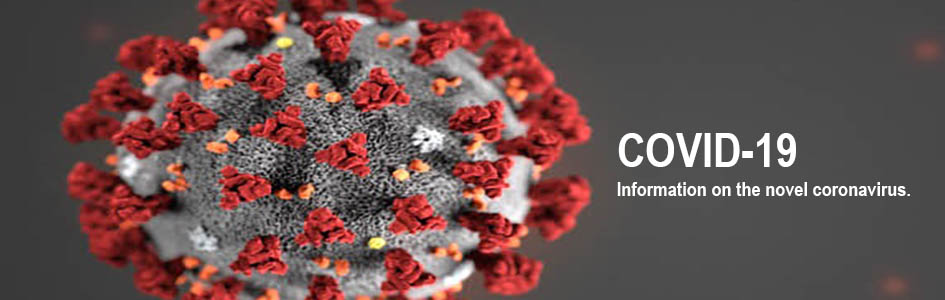
# Covid-19
>"CDC is responding to a pandemic of respiratory disease spreading from person-to-person caused by a novel (new) coronavirus. The disease has been named “coronavirus disease 2019” (abbreviated “COVID-19”). This situation poses a serious public health risk. The federal government is working closely with state, local, tribal, and territorial partners, as well as public health partners, to respond to this situation. COVID-19 can cause mild to severe illness; most severe illness occurs in older adults." - Centers for Disease Control and Prevention

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import folium

In [2]:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [3]:
country_df.columns = map(str.lower, country_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)
death_df.columns = map(str.lower, death_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)

In [4]:
confirmed_df = confirmed_df.rename(columns = {'province/state': 'state', 'country/region': 'country'})
recovered_df = recovered_df.rename(columns = {'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns = {'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns = {'province/state': 'state', 'country/region': 'country'})

In [5]:
sorted_country_df = country_df.sort_values('confirmed', ascending=False)

In [6]:
#sorted_country_df

In [7]:
fig = go.FigureWidget(layout = go.Layout())
def highlight_col(x):
    r = 'background-color: red'
    p = 'background-color: purple'
    g = 'background-color: grey'
    
    temp_df = pd.DataFrame('', index=x.index, columns = x.columns)
    temp_df.iloc[:,4] = p
    temp_df.iloc[:,5] = r
    temp_df.iloc[:,6] = g
    return temp_df

In [8]:
#sorted_country_df.style.apply(highlight_col, axis = None)

In [9]:
def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x='country_region', y='confirmed', size='confirmed',
                 color='country_region', hover_name='country_region', size_max=60)
    fig.update_layout(
    title=str(n) + " Worst hit countries",
    xaxis_title = "Countries",
    yaxis_title = "Confirmed Cases",
    width = 700)
    fig.show()
    
interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [10]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();

In [13]:
interact(plot_cases_of_a_country, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [14]:
world_map = folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2, max_zoom=6, min_zoom=2)

In [52]:
for i in range(len(confirmed_df)):
    folium.Circle(
    location =[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
    fill = True,
    radius = (int((np.log(confirmed_df.iloc[i,-1]+1.00001))) + 0.2)*50000,
    fill_color = 'blue',
    color = 'red',
    tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>" + confirmed_df.iloc[i]['country'] + "</h4>" 
                    "<hr style='margin:10px;color: white;'>" +
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: " +str(confirmed_df.iloc[i,-1])+"</li>" +
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>" +
                    "</ul></div>",
    ).add_to(world_map)
        
world_map

>Covid-19 Banner from https://www.med.navy.mil/sites/nhcl/News/Pages/COVID-19.aspx
<br>
>Covid-19 information from John Hopkins University